**Roman Schiffino**

Spring 2024

CS 251: Data Analysis and Visualization

# Lab 6b | Naive Bayes and K-Nearest Neighbor Classifiers

In this lab we will be using the library scikit-learn to train a Multinomial Naive Bayes classifier and graph the results.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection
from sklearn import neighbors, naive_bayes, metrics

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

## Task 1: Load the digits dataset

We're going to be seeing if we can use Naive Bayes and K-Nearest Neighbor to classify hand writing data.  The [digits dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html) is a set of 1797 8x8 pixel images, representing handwriting samples of the numbers 0-9. On your next project, you will work with another (much larger) handwriting dataset called [MNIST](http://yann.lecun.com/exdb/mnist/).

1. Load the [digits dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). Use the `return_X_y` parameter so that it returns both the X data and y classifications.
2. Use [train test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split the X data and y classifications, into an X_training dataset, X_testing dataset and the corresponding y_training labels and y_testing labels.  Set the test size be `0.3` (i.e 30%) and shuffle to True.
3. Print the shape of `X_training`, `X_testing`, `y_training`, and `y_testing`.

In [18]:
np.random.seed(42)
digits = datasets.load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(digits[0], digits[1], test_size=0.3, shuffle=True)

print(f"X training data shape:  {X_train.shape}")
print(f"X testing data shape:   {X_test.shape}")
print(f"y training labels shape:{y_train.shape}")
print(f"y testing labels shape: {y_test.shape}")

print('''
X training data shape:  (1257, 64)
X testing data shape:   (540, 64)
y training labels shape:(1257,)
y testing labels shape: (540,)
''')

X training data shape:  (1257, 64)
X testing data shape:   (540, 64)
y training labels shape:(1257,)
y testing labels shape: (540,)

X training data shape:  (1257, 64)
X testing data shape:   (540, 64)
y training labels shape:(1257,)
y testing labels shape: (540,)



## Task 2: Create Classifiers and Calculate Accuracy

### Create a Naive Bayes Classifier
1. Create a [Multinomial Naive Bayes Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB) [(More Info)](https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes). 
2. Use the fit method with the training dataset as X and the y training dataset labels as the target.
3. Calculate the accuracy of the classifier with the test data and test dataset labels using the score method.
4. Print the accuracy of the Naive Bayes classifier.

### Create a K-NN Classifier
1. Using the lab from last week as reference, create a [K-Nearest Neighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) [(More Info)](https://scikit-learn.org/stable/modules/neighbors.html#classification).  Set n_neighbors equal to 7.
1. Assign your classifier to a variable with a **different** name than your Naive Bayes classifier.  
2. Use the fit method with the training dataset as X and the y training dataset labels as the target.
3. Calculate the accuracy of the classifier with the test data and test dataset labels using the score method.
4. Print the accuracy of the K-NN classifier.


In [19]:
# Multinomial Naive Bayes Classifier
nb = naive_bayes.MultinomialNB()
nb.fit(X_train, y_train)
nb_score = nb.score(X_test, y_test)
print(f"Multinomial Naive Bayes Classifier Accuracy: {nb_score:.5f}")

# K-Nearest Neighbor Classifier
knn = neighbors.KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)
print(f"K-Nearest Neighbor Classifier Accuracy:   {knn_score:.5f}")


print('''
Multinomial Naive Bayes Classifier Accuracy: 0.89444...
K-Nearest Neighbor Classifier Accuracy:   0.99074...
''')

Multinomial Naive Bayes Classifier Accuracy: 0.89444
K-Nearest Neighbor Classifier Accuracy:   0.99074

Multinomial Naive Bayes Classifier Accuracy: 0.89444...
K-Nearest Neighbor Classifier Accuracy:   0.99074...



## Task 3: Create a confusion matrix for each classifier

1. Find the predicted labels for the X test data using the predict method for the Naive Bayes classifier and K-NN classifier.
1. Create a [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) for each classifier, using the actual labels and predicted labels.  
2. Print the confusion matrices. If everything is working as expected, you should see vast majority of numbers along the main diagonal (*going from the top-left to the bottom-right of the matrix*).
3. Visualize the confusion matrices using imshow. For reference, use Lab 4a and this [matplotlib example](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html) of an annotated heatmap.
    1. Set x_ticks and y_ticks to align with the list of digits.
    2. Use imshow to draw the matrix
    3. Choose a perceptually uniform, sequential [colormap](https://matplotlib.org/tutorials/colors/colormaps.html)
    4. Use a colorbar to label the matrix
    5. Remember to call `plt.show()` at the end, or other plots later might not work.
    6. Give your plots meaningful titles.

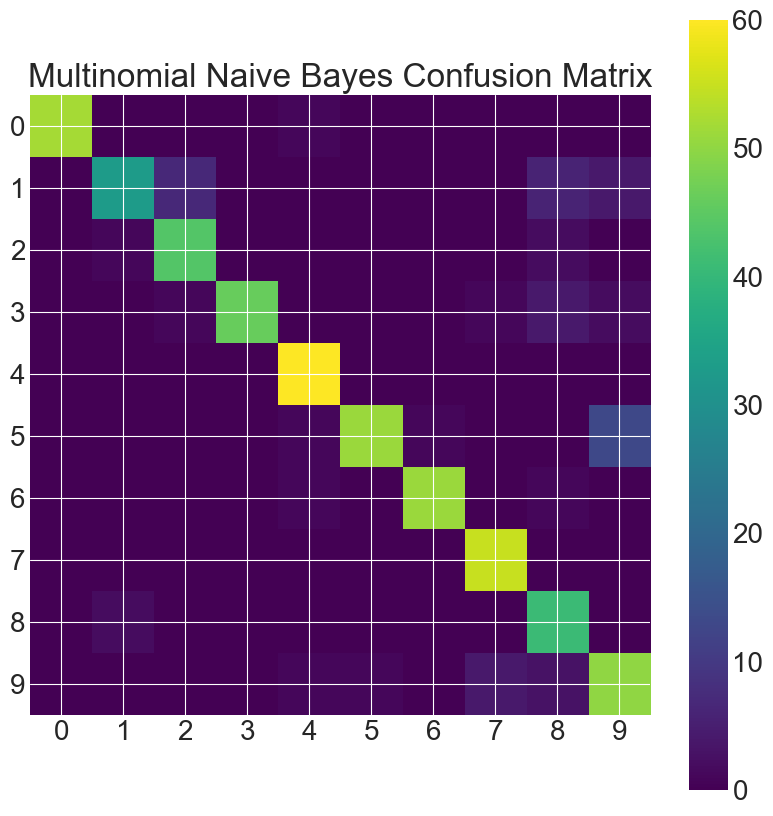

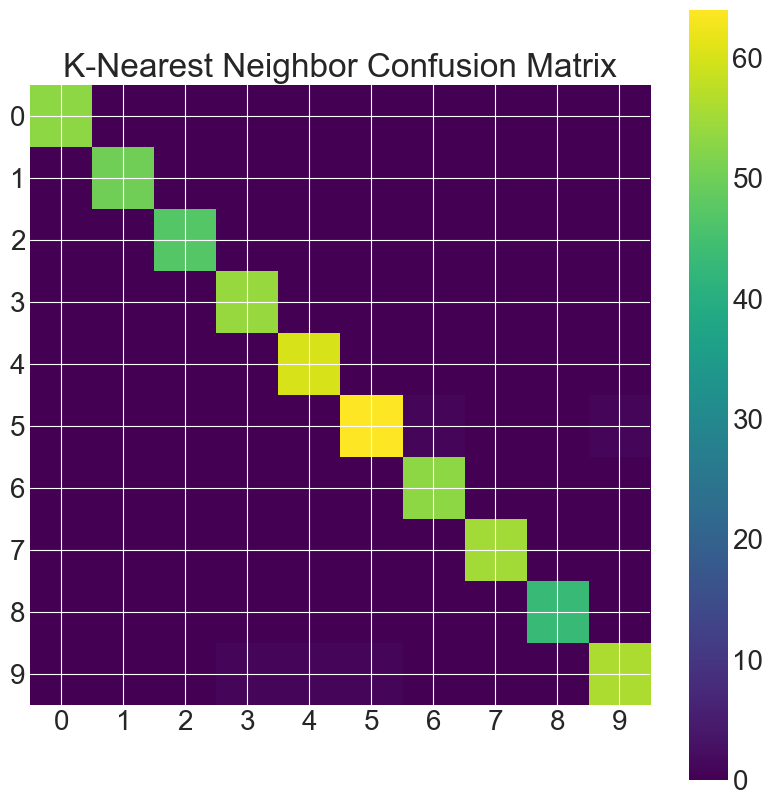

K-Nearest Neighbor Confusion Matrix
 [[52  0  0  0  1  0  0  0  0  0]
 [ 0 33  7  0  0  0  0  0  6  4]
 [ 0  1 44  0  0  0  0  0  2  0]
 [ 0  0  1 46  0  0  0  1  4  2]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  1 51  1  0  0 13]
 [ 0  0  0  0  1  0 51  0  1  0]
 [ 0  0  0  0  0  0  0 55  0  0]
 [ 0  2  0  0  0  0  0  0 41  0]
 [ 0  0  0  0  1  1  0  4  3 50]]
Multinomial Naive Bayes Confusion Matrix
 [[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 64  1  0  0  1]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 55  0  0]
 [ 0  0  0  0  0  0  0  0 43  0]
 [ 0  0  0  1  1  1  0  0  0 56]]

K-Nearest Neighbor Confusion Matrix
 [[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 64  1  0  0  1]
 [ 0  0  0  0  0  0 53 

In [20]:
# Multinomial Naive Bayes Classifier

nb_pred = nb.predict(X_test)
nb_confusion = metrics.confusion_matrix(y_test, nb_pred)

plt.figure(figsize=(10, 10))
plt.imshow(nb_confusion, cmap='viridis')
plt.colorbar()
plt.xticks(range(10))
plt.yticks(range(10))
plt.title("Multinomial Naive Bayes Confusion Matrix")
plt.show()

# K-Nearest Neighbor Classifier
knn_pred = knn.predict(X_test)
knn_confusion = metrics.confusion_matrix(y_test, knn_pred)

plt.figure(figsize=(10, 10))
plt.imshow(knn_confusion, cmap='viridis')
plt.colorbar()
plt.xticks(range(10))
plt.yticks(range(10))
plt.title("K-Nearest Neighbor Confusion Matrix")
plt.show()

print("K-Nearest Neighbor Confusion Matrix\n", knn_confusion)
print("Multinomial Naive Bayes Confusion Matrix\n", nb_confusion)


print('''
K-Nearest Neighbor Confusion Matrix
 [[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 64  1  0  0  1]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 55  0  0]
 [ 0  0  0  0  0  0  0  0 43  0]
 [ 0  0  0  1  1  1  0  0  0 56]]
 Multinomial Naive Bayes Confusion Matrix
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 33  7  0  0  0  0  0  6  4]
 [ 0  1 44  0  0  0  0  0  2  0]
 [ 0  0  1 46  0  0  0  1  4  2]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  1 51  1  0  0 13]
 [ 0  0  0  0  1  0 51  0  1  0]
 [ 0  0  0  0  0  0  0 55  0  0]
 [ 0  2  0  0  0  0  0  0 41  0]
 [ 0  0  0  0  1  1  0  4  3 50]]
''')

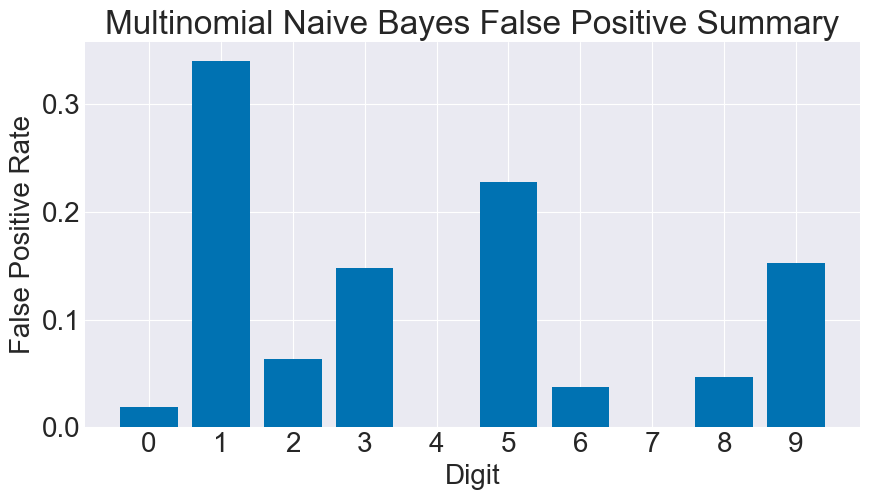

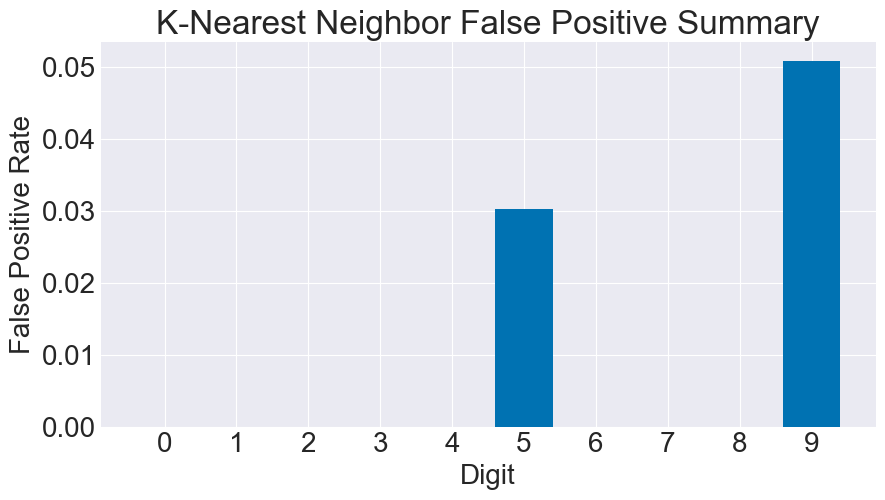

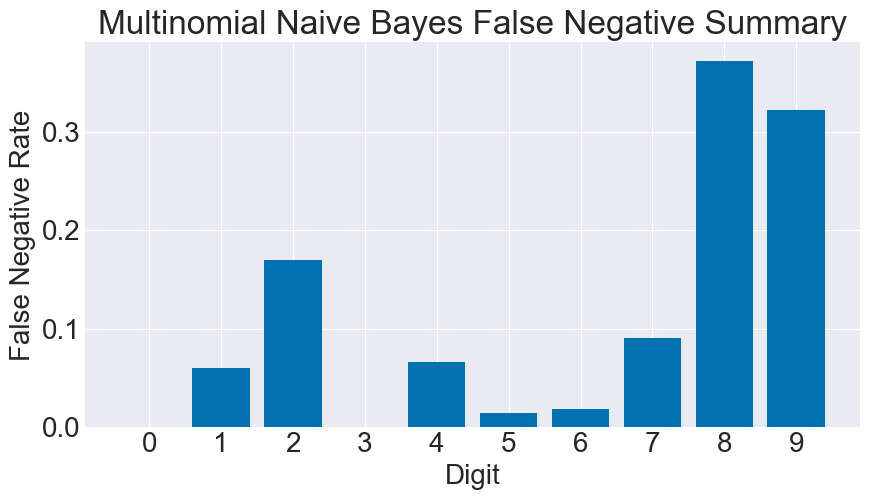

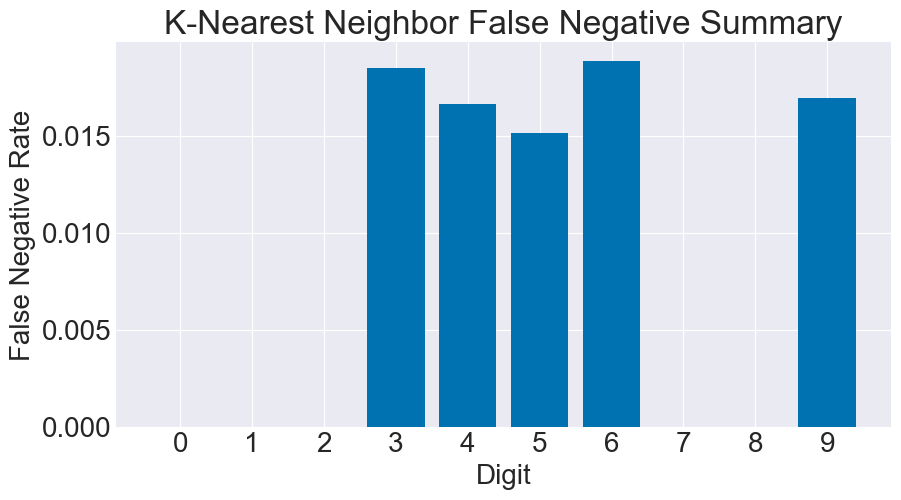

In [25]:
# Multinomial Naive Bayes Classifier FP Summary

nb_miss = nb_confusion - np.identity(10) * nb_confusion
nb_miss = nb_miss.astype(int)
nb_miss_summary = np.sum(nb_miss, axis=1)
nb_miss_summary = nb_miss_summary / np.nansum(nb_confusion, axis=1)

plt.figure(figsize=(10, 5))
plt.bar(range(10), nb_miss_summary)
plt.xticks(range(10))
plt.title("Multinomial Naive Bayes False Positive Summary")
plt.xlabel("Digit")
plt.ylabel("False Positive Rate")
plt.show()

# K-Nearest Neighbor Classifier FP Summary

knn_miss = knn_confusion - np.identity(10) * knn_confusion
knn_miss = knn_miss.astype(int)
knn_miss_summary = np.sum(knn_miss, axis=1)
knn_miss_summary = knn_miss_summary / np.nansum(knn_confusion, axis=1)

plt.figure(figsize=(10, 5))
plt.bar(range(10), knn_miss_summary)
plt.xticks(range(10))
plt.title("K-Nearest Neighbor False Positive Summary")
plt.xlabel("Digit")
plt.ylabel("False Positive Rate")
plt.show()

# Multinomial Naive Bayes Classifier FN Summary

nb_miss_FN = np.sum(nb_miss, axis=0)
nb_miss_summary = nb_miss_FN / np.nansum(nb_confusion, axis=1)

plt.figure(figsize=(10, 5))
plt.bar(range(10), nb_miss_summary)
plt.xticks(range(10))
plt.title("Multinomial Naive Bayes False Negative Summary")
plt.xlabel("Digit")
plt.ylabel("False Negative Rate")
plt.show()

# K-Nearest Neighbor Classifier FN Summary

knn_miss_FN = np.sum(knn_miss, axis=0)
knn_miss_summary = knn_miss_FN / np.sum(knn_confusion, axis=1)

plt.figure(figsize=(10, 5))
plt.bar(range(10), knn_miss_summary)
plt.xticks(range(10))
plt.title("K-Nearest Neighbor False Negative Summary")
plt.xlabel("Digit")
plt.ylabel("False Negative Rate")
plt.show()

### Question 1: Which digits are most likely to be misclassified and what are they most likely to be misclassified as?

## Answer 1: 
With KNN the digit most likely to be misclassified is 9, and next is 5. 9 is most often misclassified as 3, 4, or 5, and 5, is most often misclassified as 6 or 9. As for false negatives, 3,4,5,6, and 9 all have relatively similar rates all are very low.

With Naive Bayes the digit most likely to be misclassified is 1, then 5 then 9. I don't want to try and discern which they get misclassified as. Rest except 4 and 7 have zero misclassificatiom. False negative rates are very high on 8 and 9. Overall miss rates are much higher than KNN.



